In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils import FunctionBasicExperiment
import seaborn as sns

In [4]:
exp = FunctionBasicExperiment()

In [31]:
exp.run_experiment(participant='will', N_var=4, N_trials=40)

FunctionBasicExperiment(experiment='{"trials": [{"program": "def u(f,e):\\n    return e + f\\ndef k():\\n    r…

In [134]:
# from utils import pcache
# raw_old_data = [
#     pcache.get(exp.exp_name(N_var=n, N_trials=30, participant='will'))
#     for n in exp.all_exp
# ]

# pcache.set('function_basic_raw_old', raw_old_data)

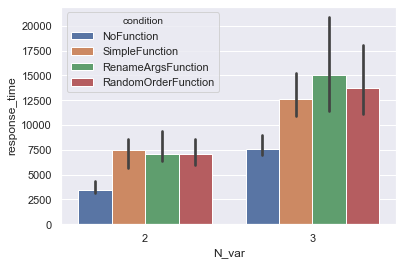

In [29]:
from numpy import median
sns.barplot(
    data=exp.results(), x='N_var', y='response_time', hue='condition', estimator=median,
    hue_order=[str(c).split('.')[1] for c in exp.Condition])

In [97]:
med = exp.results().groupby(['N_var', 'with_functions']).response_time.median()
med

N_var  with_functions
2      False              5703
       True               7233
3      False             11273
       True              18890
4      False             20278
       True              32228
Name: response_time, dtype: int64

In [117]:
med2 = med.reset_index()
def rt(df, wf):
    return df[df.with_functions == wf].iloc[0].response_time

for N_var in exp.all_exp:
    df = med2[med2.N_var == N_var]
    print(rt(df, True) - rt(df, False))

1530
7617
11950


In [120]:
for i, N_var in enumerate(exp.all_exp[1:]):
    cur = med2[med2.N_var == N_var]
    prev = med2[med2.N_var == exp.all_exp[i]]
    print('wf', rt(cur, True) / rt(prev, True))
    print('no', rt(cur, False) / rt(prev, False))

wf 2.6116410894511266
no 1.9766789409082939
wf 1.7060878771836951
no 1.79881131908099


In [85]:
exp.results().groupby(['N_var', 'with_functions']).correct.mean()

N_var  with_functions
2      False             1.000000
       True              1.000000
3      False             1.000000
       True              0.866667
4      False             0.933333
       True              0.800000
Name: correct, dtype: float64